In [49]:

import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt

In [50]:
env = gym.make("FrozenLake-v0")

In [51]:

action_size = env.action_space.n
state_size = env.observation_space.n

In [52]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [171]:

total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95  

In [172]:

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

In [173]:
rewards = []
delta_list = []
steps_over_iteration = []
score_over_iteration = []
time_list = []
total_episodes = 15000
# 2 For life or until learning is stopped
for episode in range(1,total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        start_time = time.time()
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable_prev = np.copy(qtable[state, action])
        qtable[state, action] = qtable_prev + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
      
        total_rewards += reward

        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish current episode at this step 
        if done == True:
            #print("iteration is ", episode)
            #print("step is ", step)
            steps_over_iteration.append(step)
            break
    
   
     
                 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)  # Reduce epsilon (because we need less and less exploration)
    rewards.append(total_rewards)# total rewards from all steps at current iteration 
    delta = np.sum(np.fabs(qtable - qtable_prev))
    round_delta = round(delta, 0)
    delta_list.append(round_delta) 
    total_time = time.time() - start_time
    time_list.append(total_time)

    #print ("Score over time: " +  str(sum(rewards)/episode))
    score_over_iteration.append(sum(rewards)/episode) ### make it look better???
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.48013333333333336
[[3.12010938e-01 7.72275093e-02 7.79289619e-02 7.55956886e-02]
 [3.14263128e-03 4.62473353e-03 6.99356680e-04 7.25824118e-02]
 [2.69294788e-03 6.00821271e-03 1.65756443e-02 5.65941118e-02]
 [5.63235867e-03 6.27693442e-03 3.19845966e-03 2.99370994e-02]
 [3.29961817e-01 2.62687151e-02 2.09653373e-02 4.27192624e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.29015622e-05 3.43573127e-05 6.98903703e-06 1.18367058e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.80425581e-03 1.29325435e-02 2.60763731e-02 1.86681369e-01]
 [1.73871498e-03 4.45217574e-01 1.56510943e-03 8.03967834e-03]
 [7.18526970e-02 2.42862075e-02 1.19386945e-03 6.97075067e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.68095674e-02 1.01787897e-01 5.87284985e-01 8.33245250e-03]
 [1.36784306e-01 9.20084120e-01 2.85418528e-01 1.68471850e-01]
 [0.00000000e+00 0

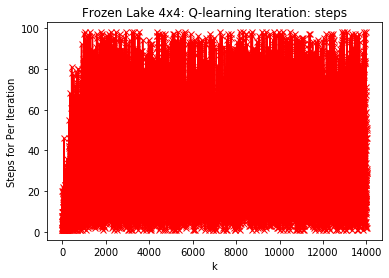

In [174]:

total_episodes = len(steps_over_iteration)
K = range(total_episodes)

plt.plot(K, steps_over_iteration, 'rx-')
plt.xlabel('k')
plt.ylabel('Steps for Per Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: steps')
plt.show()


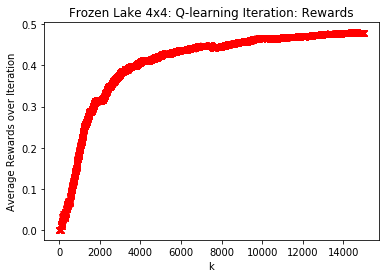

In [175]:
total_episodes = 15000
K = range(1,total_episodes)
score_over_iteration2 = [x+0.4 for x in score_over_iteration]
plt.plot(K, score_over_iteration, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Rewards')
plt.show()

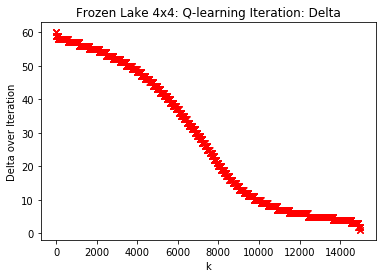

In [176]:
total_episodes = 15000
K = range(1,total_episodes)
delta_list.sort(reverse = True )
plt.plot(K, delta_list , 'rx-')
plt.xlabel('k')
plt.ylabel('Delta over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Delta')
plt.show()

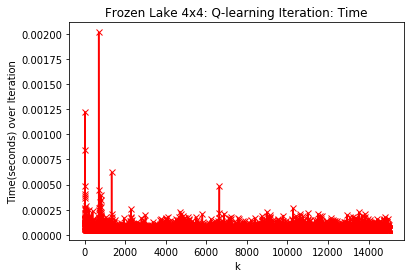

In [177]:
total_episodes = 15000
K = range(1,total_episodes)

plt.plot(K, time_list , 'rx-')
plt.xlabel('k')
plt.ylabel('Time(seconds) over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Time')
plt.show()

In [96]:
rewards = []
delta_list = []
steps_over_iteration = []
score_over_iteration_ep0_1 = []
time_list = []
total_episodes = 3000
epsilon = 0.1
# 2 For life or until learning is stopped
for episode in range(1,total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        start_time = time.time()
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable_prev = np.copy(qtable[state, action])
        qtable[state, action] = qtable_prev + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
      
        total_rewards += reward

        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish current episode at this step 
        if done == True:
            #print("iteration is ", episode)
            #print("step is ", step)
            steps_over_iteration.append(step)
            break
                 
    #epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)  # Reduce epsilon (because we need less and less exploration)
    rewards.append(total_rewards)# total rewards from all steps at current iteration 
    delta = np.sum(np.fabs(qtable - qtable_prev))
    round_delta = round(delta, 0)
    delta_list.append(round_delta) 
    total_time = time.time() - start_time
    time_list.append(total_time)
        #print ("Score over time: " +  str(sum(rewards)/episode))
    score_over_iteration_ep0_1.append(sum(rewards)/episode) ### make it look better???
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)


Score over time: 0.169
[[2.81221850e-01 2.66607332e-01 2.55512563e-01 9.24653747e-02]
 [1.43860552e-03 2.69114251e-02 6.14167617e-05 2.58713469e-01]
 [3.47206101e-01 3.38775150e-02 3.05054729e-02 5.42906685e-02]
 [1.14358728e-02 7.08853466e-03 2.69985477e-02 3.06671736e-01]
 [3.84055467e-01 4.15015735e-02 7.57517224e-03 2.63194778e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.46997494e-04 1.89285991e-02 8.79684713e-02 1.30770573e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.80647599e-03 6.78825529e-02 5.35329486e-02 6.02497177e-01]
 [1.37656735e-01 5.51056423e-01 2.26913964e-02 6.80459345e-02]
 [5.88395917e-01 2.40385222e-02 3.49523094e-01 1.90190576e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.61166518e-02 3.48572952e-01 8.09685410e-01 4.62610250e-01]
 [6.42925328e-01 9.69301995e-01 1.64800757e-01 4.69023914e-01]
 [0.00000000e+00 0.00000000e+00 

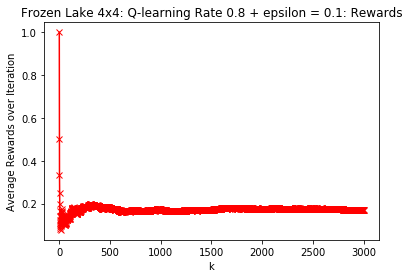

In [97]:
total_episodes = 3000
K = range(1,total_episodes)
score_over_iteration2_ep0_1 = [x+0.4 for x in score_over_iteration_ep0_1]
plt.plot(K, score_over_iteration_ep0_1, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.8 + epsilon = 0.1: Rewards')
plt.show()

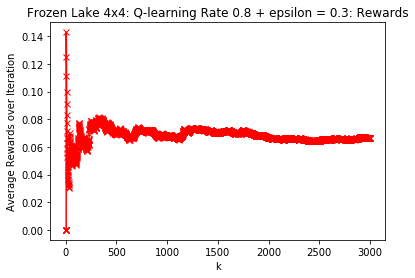

In [99]:
total_episodes = 3000
K = range(1,total_episodes)
score_over_iteration2_ep0_3 = [x+0.4 for x in score_over_iteration_ep0_3]
plt.plot(K, score_over_iteration_ep0_3, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.8 + epsilon = 0.3: Rewards')
plt.show()

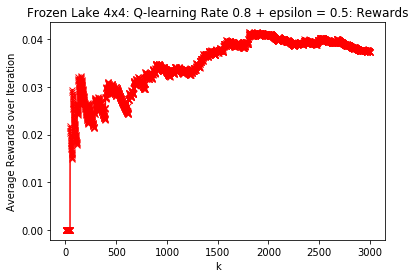

In [101]:
total_episodes = 3000
K = range(1,total_episodes)
score_over_iteration2_ep0_5 = [x+0.4 for x in score_over_iteration_ep0_5]
plt.plot(K, score_over_iteration_ep0_5, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.8 + epsilon = 0.5: Rewards')
plt.show()

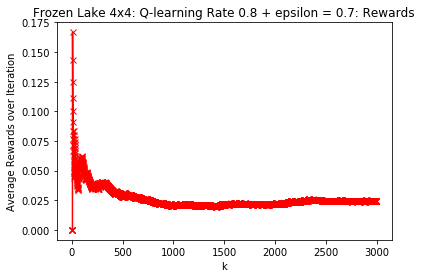

In [165]:
total_episodes = 3000
K = range(1,total_episodes)
score_over_iteration2_ep0_7 = [x+0.4 for x in score_over_iteration_ep0_7]
plt.plot(K, score_over_iteration_ep0_7, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.8 + epsilon = 0.7: Rewards')
plt.show()

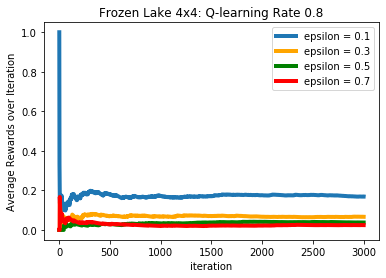

In [162]:
total_episodes = 3000
K = range(1,total_episodes)
plt.plot( K, score_over_iteration_ep0_1, markerfacecolor='blue', linewidth=4, label= 'epsilon = 0.1')
plt.plot( K, score_over_iteration_ep0_3,  marker='', color='orange', linewidth=4, label= 'epsilon = 0.3')
plt.plot( K, score_over_iteration_ep0_5,  marker='', color='green', linewidth=4, label= 'epsilon = 0.5')
plt.plot( K, score_over_iteration_ep0_7,  marker='', color='red', linewidth=4, label= 'epsilon = 0.7')
plt.xlabel('iteration')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.8')
plt.legend()


In [155]:
rewards = []
delta_list = []
steps_over_iteration = []
score_over_iteration_ep0_change = []
time_list = []
total_episodes = 3000
epsilon = 1.0
learning_rate = 0.1
# 2 For life or until learning is stopped
for episode in range(1,total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        start_time = time.time()
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable_prev = np.copy(qtable[state, action])
        qtable[state, action] = qtable_prev + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
      
        total_rewards += reward

        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish current episode at this step 
        if done == True:
            #print("iteration is ", episode)
            #print("step is ", step)
            steps_over_iteration.append(step)
            break
                 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)  # Reduce epsilon (because we need less and less exploration)
    rewards.append(total_rewards)# total rewards from all steps at current iteration 
    delta = np.sum(np.fabs(qtable - qtable_prev))
    round_delta = round(delta, 0)
    delta_list.append(round_delta) 
    total_time = time.time() - start_time
    time_list.append(total_time)
        #print ("Score over time: " +  str(sum(rewards)/episode))
    score_over_iteration_ep0_change.append(sum(rewards)/episode) ### make it look better???
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.5223333333333333
[[0.15930663 0.1554697  0.15553435 0.15043772]
 [0.07849269 0.09765082 0.10057161 0.149158  ]
 [0.14621933 0.10113722 0.11299888 0.10303671]
 [0.0620684  0.08194887 0.08860841 0.09855537]
 [0.18276543 0.13444233 0.09819374 0.13298745]
 [0.         0.         0.         0.        ]
 [0.062328   0.07271894 0.18657228 0.05561484]
 [0.         0.         0.         0.        ]
 [0.17594538 0.17822849 0.19842074 0.25410709]
 [0.28830608 0.36813444 0.21420369 0.17456476]
 [0.53132675 0.22071979 0.24091293 0.23772672]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.28646777 0.38345031 0.45482556 0.40495424]
 [0.44699787 0.8118887  0.46581398 0.52878999]
 [0.         0.         0.         0.        ]]


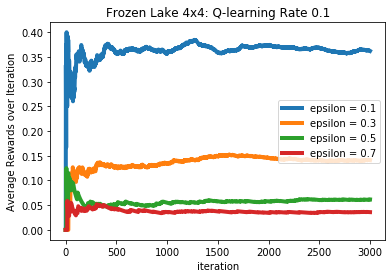

In [161]:
from matplotlib.font_manager import FontProperties

total_episodes = 3000
K = range(1,total_episodes)
plt.plot( K, score_over_iteration_ep0_1_1, markerfacecolor='blue', linewidth=4, label= 'epsilon = 0.1')
plt.plot( K, score_over_iteration_ep0_1_3, markerfacecolor='orange', linewidth=4, label= 'epsilon = 0.3')
plt.plot( K, score_over_iteration_ep0_1_5, markerfacecolor='green', linewidth=4, label= 'epsilon = 0.5')
plt.plot( K, score_over_iteration_ep0_1_7, markerfacecolor='purple', linewidth=4, label= 'epsilon = 0.7')
plt.xlabel('iteration')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Rate 0.1')
plt.gca().legend(loc = 'right')


